Train samples: 160
Val samples: 20
Test samples: 20
SVM Teste - Acurácia: 0.9500
SVM Teste - F1 Score: 0.9467


100%|██████████| 20/20 [00:00<00:00, 122.09it/s]
c:\Users\Administrador\Downloads\trabalho-de-PDI\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,506 (14.14 MB)

 Trainable params: 3,706,506 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.1000 - loss: 2.7481 - val_accuracy: 0.2000 - val_loss: 2.3307
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.0875 - loss: 2.3233 - val_accuracy: 0.2000 - val_loss: 2.2684
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.1625 - loss: 2.2224 - val_accuracy: 0.1500 - val_loss: 2.1183
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.2438 - loss: 2.0447 - val_accuracy: 0.5500 - val_loss: 1.8264
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.5250 - loss: 1.6974 - val_accuracy: 0.5500 - val_loss: 1.4620
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.6125 - loss: 1.2841 - val_accuracy: 0.5500 - val_loss: 1.1863
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.6250 - loss: 0.9922 - val_accuracy: 0.6500 - val_loss: 0.9521
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.6938 - loss: 0.9480 - val_accuracy: 0.5500 - val_loss:

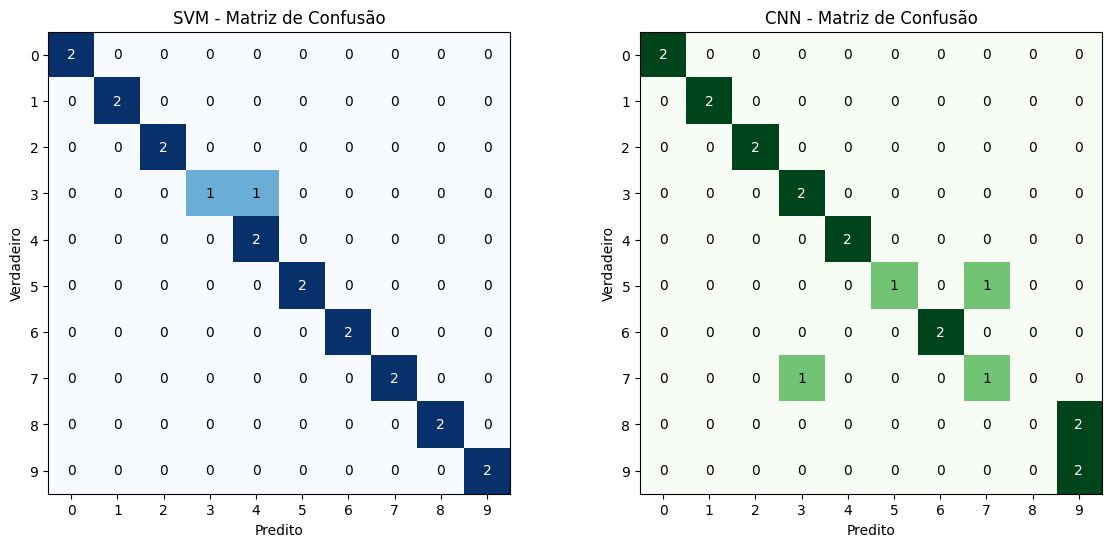

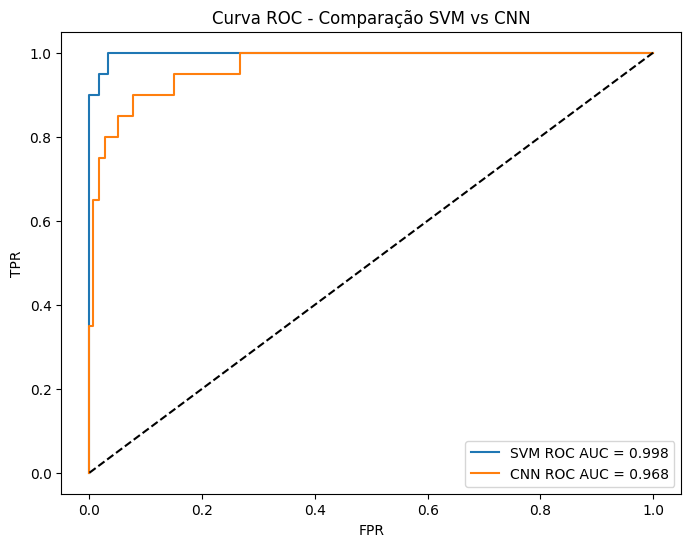

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

import tensorflow as tf
from tensorflow.keras import layers, models

from tqdm import tqdm

# ===========================
# 1. Carrega os splits
# ===========================
train_df = pd.read_csv("splits/train.csv")
val_df = pd.read_csv("splits/val.csv")
test_df = pd.read_csv("splits/test.csv")

print(f"Train samples: {len(train_df)}")
print(f"Val samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

# ===========================
# 2. SVM: Features
# ===========================
X_train = train_df.drop(columns=["filename", "class_id"])
y_train = train_df["class_id"]

X_val = val_df.drop(columns=["filename", "class_id"])
y_val = val_df["class_id"]

X_test = test_df.drop(columns=["filename", "class_id"])
y_test = test_df["class_id"]

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Treina SVM
svm = SVC(kernel="linear", probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_test_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_test_pred)
svm_f1 = f1_score(y_test, y_test_pred, average="weighted")

print(f"SVM Teste - Acurácia: {svm_acc:.4f}")
print(f"SVM Teste - F1 Score: {svm_f1:.4f}")

# ===========================
# 3. CNN: Carrega Imagens Originais
# ===========================
IMG_SIZE = (128, 128)  # Ajuste conforme precisar
images_dir = "dataset/images"

def load_images(df):
    X = []
    y = []
    for _, row in tqdm(df.iterrows(), total=len(df)):
        img_path = os.path.join(images_dir, row["filename"])
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        X.append(img_array)
        y.append(row["class_id"])
    return np.array(X), np.array(y)

X_train_img, y_train_img = load_images(train_df)
X_val_img, y_val_img = load_images(val_df)
X_test_img, y_test_img = load_images(test_df)

# One-hot encoding
lb = LabelBinarizer()
y_train_img_oh = lb.fit_transform(y_train_img)
y_val_img_oh = lb.transform(y_val_img)
y_test_img_oh = lb.transform(y_test_img)


# Mais robusto para evitar overfitting e acelerar a convergência
# MUITO RUIM: A matriz da cnn se concetra apenas na segunda classe
#model = models.Sequential([
#    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, 3)),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D(),
#    layers.Conv2D(64, (3, 3), activation='relu'),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D(),
#    layers.Flatten(),
#    layers.Dense(128, activation='relu'),
#    layers.Dropout(0.5),
#    layers.Dense(len(lb.classes_), activation='softmax')
#])

# ===========================
# 4. CNN Modelo
# ===========================
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(lb.classes_), activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    X_train_img, y_train_img_oh,
    epochs=10,
    validation_data=(X_val_img, y_val_img_oh)
)

# ===========================
# 5. CNN Avaliação
# ===========================
y_test_probs = model.predict(X_test_img)
y_test_pred_cnn = np.argmax(y_test_probs, axis=1)

cnn_acc = accuracy_score(y_test_img, y_test_pred_cnn)
cnn_f1 = f1_score(y_test_img, y_test_pred_cnn, average="weighted")

print(f"\nCNN Teste - Acurácia: {cnn_acc:.4f}")
print(f"CNN Teste - F1 Score: {cnn_f1:.4f}")

# ===========================
# 6. Matrizes de Confusão
# ===========================
cm_svm = confusion_matrix(y_test, y_test_pred)
cm_cnn = confusion_matrix(y_test_img, y_test_pred_cnn)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0].set_title("SVM - Matriz de Confusão")
axs[1].imshow(cm_cnn, interpolation='nearest', cmap=plt.cm.Greens)
axs[1].set_title("CNN - Matriz de Confusão")

for ax, cm in zip(axs, [cm_svm, cm_cnn]):
    tick_marks = np.arange(len(lb.classes_))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xlabel("Predito")
    ax.set_ylabel("Verdadeiro")
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

plt.show()

# ===========================
# 7. Comparação ROC
# ===========================
y_test_svm_probs = svm.predict_proba(X_test_scaled)
y_test_bin = lb.transform(y_test)

fpr_svm, tpr_svm, _ = roc_curve(y_test_bin.ravel(), y_test_svm_probs.ravel())
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test_img_oh.ravel(), y_test_probs.ravel())
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM ROC AUC = {roc_auc_svm:.3f}")
plt.plot(fpr_cnn, tpr_cnn, label=f"CNN ROC AUC = {roc_auc_cnn:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC - Comparação SVM vs CNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
